### 다항(Polynomial) 회귀

In [1]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures

In [2]:
X = np.arange(4).reshape(2,2)
X

array([[0, 1],
       [2, 3]])

In [3]:
poly = PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr = poly.transform(X)
print('변환된 2차 다항식 계수 피쳐:\n', poly_ftr)

변환된 2차 다항식 계수 피쳐:
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


In [4]:
# 3차 다항식 y = 1 + 2x1 + 3x1**2 + 4x2**3
def polynomial_func(X):
    y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
    return y

In [5]:
y = polynomial_func(X)
y

array([  5, 125])

In [11]:
# 3차 다항식 변환
poly_ftr = PolynomialFeatures(degree=3).fit_transform(X)
print('3차 다항식 계수:\n', poly_ftr)

3차 다항식 계수:
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]


In [13]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(poly_ftr, y)
print('회귀 계수:\n', np.round(lr.coef_, 3))

회귀 계수:
 [0.    0.18  0.18  0.36  0.541 0.721 0.721 1.081 1.622 2.342]


In [14]:
# 회귀 shape
lr.coef_.shape

(10,)

- 과소적합 / 과적합

In [15]:
import matplotlib.pyplot as plt 
from sklearn.pipeline import Pipeline 
from sklearn.model_selection import cross_val_score

In [16]:
# 임의의 값으로 구성된 X 값에 대해 코사인 변환 값을 반환
def true_func(X):
    return np.cos(1.5 * np.pi * X)

In [17]:
np.random.seed(2023)
n_samples = 30
X = np.sort(np.random.rand(n_samples))
X

array([0.02208966, 0.03564821, 0.10395184, 0.12659609, 0.14134122,
       0.1511723 , 0.16207701, 0.18032328, 0.18405414, 0.19586384,
       0.20346149, 0.32060446, 0.3219883 , 0.33795869, 0.36087518,
       0.37656378, 0.37852542, 0.3909914 , 0.39446855, 0.45492722,
       0.45637326, 0.46789559, 0.50138226, 0.52438734, 0.54493524,
       0.56486165, 0.58805226, 0.72727471, 0.89042245, 0.93053196])

In [18]:
# y 값은 코사인 기반의 true_func()에서 약간의 노이즈를 더한 값
y = true_func(X) + np.random.randn(n_samples) * 0.1
y

array([ 1.07176191,  1.06007548,  1.01487431,  0.87119613,  0.73047811,
        0.84951456,  0.66216104,  0.50819352,  0.85659433,  0.69269752,
        0.73415981, -0.00392876, -0.059868  ,  0.04386493, -0.06984514,
       -0.28342448, -0.24141006, -0.16753732, -0.39290051, -0.72086134,
       -0.51380479, -0.71781066, -0.67461888, -0.73800091, -1.06829998,
       -0.88719492, -0.6922727 , -1.21780082, -0.36262757, -0.47949251])


Degree 1 회귀 계수: [-2.6013]
Degree 1 MSE: 0.3506021458131413

Degree 4 회귀 계수: [  0.9178 -20.839   28.4734  -9.5576]
Degree 4 MSE: 5.048926095318803

Degree 15 회귀 계수: [ 1.88269040e+03 -8.60592677e+04  2.06045938e+06 -2.98254667e+07
  2.83172001e+08 -1.85411480e+09  8.63943714e+09 -2.91835662e+10
  7.20545076e+10 -1.29831769e+11  1.68576321e+11 -1.53372484e+11
  9.26565958e+10 -3.33426220e+10  5.40245509e+09]
Degree 15 MSE: 1088272340788067.8


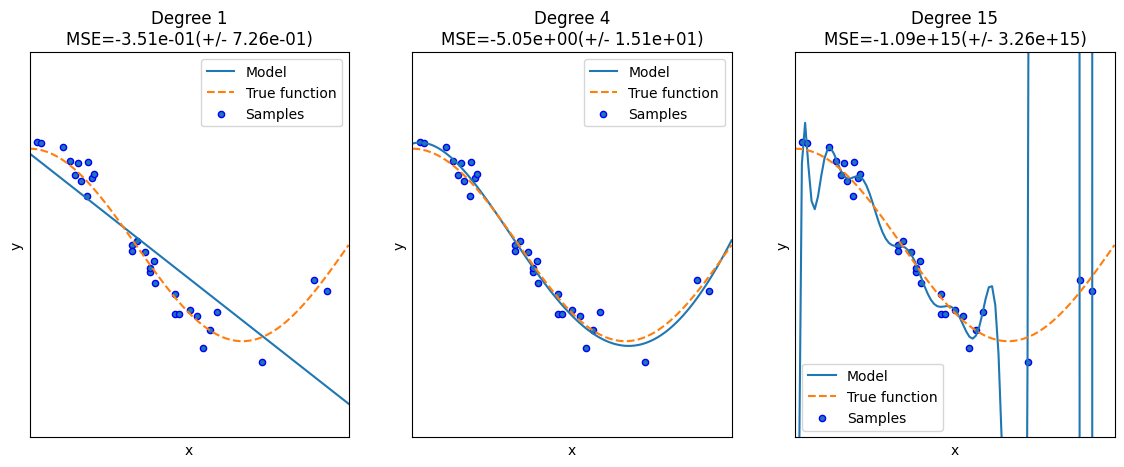

In [21]:
plt.figure(figsize=(14,5))
degrees = [1, 4, 15]
for i, degree in enumerate(degrees):
    ax = plt.subplot(1, len(degrees), i+1)
    plt.setp(ax, xticks=(), yticks=())

    # 개별 degree 별로 Polynomial 변환
    poly_ftr = PolynomialFeatures(degree=degree, include_bias=False)
    lr = LinearRegression()
    pipeline = Pipeline([('poly_ftr', poly_ftr), ('lr', lr)])
    pipeline.fit(X.reshape(-1, 1), y)

    # 교차 검증으로 다항회귀 평가
    scores = cross_val_score(pipeline, X.reshape(-1, 1), y, scoring='neg_mean_squared_error', cv=10)
    coefs = pipeline.named_steps['lr'].coef_
    print(f'\nDegree {degree} 회귀 계수: {np.round(coefs, 4)}')
    print(f'Degree {degree} MSE: {-np.mean(scores)}')

    X_test = np.linspace(0, 1, 100)
    # 예측값 곡선
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label='Model')
    # 실제값 곡선
    plt.plot(X_test, true_func(X_test), '--', label='True function')
    plt.scatter(X, y, edgecolors='b', s=20, label='Samples')

    plt.xlabel('x'), plt.ylabel('y')
    plt.xlim((0,1)), plt.ylim((-2,2)), plt.legend()
    plt.title(f'Degree {degree}\nMSE={scores.mean():.2e}(+/- {scores.std():.2e})')
plt.show()